In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt_tab')
import re, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD
from wordcloud import WordCloud

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\atliu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atliu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("CombinedData.csv")[["statement", "status"]]
df.head()

statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [4]:
df.dropna(inplace=True)

In [5]:
fig = px.pie(values=df.groupby("status").count()["statement"].values, names=df.groupby("status").count().index, title="Status rates")
fig.show()

In [6]:
def sentence_count(x):
    return nltk.sent_tokenize(x)

In [7]:
df["char_count"] = df["statement"].str.len()
df["sentences"] = df["statement"].apply(sentence_count)
df["sentence_count"] = df["sentences"].str.len()
df.head()

statement   status  char_count  \
0                                         oh my gosh  Anxiety          10   
1  trouble sleeping, confused mind, restless hear...  Anxiety          64   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety          78   
3  I've shifted my focus to something else but I'...  Anxiety          61   
4  I'm restless and restless, it's been a month n...  Anxiety          72   

                                           sentences  sentence_count  
0                                       [oh my gosh]               1  
1  [trouble sleeping, confused mind, restless hea...               2  
2  [All wrong, back off dear, forward doubt., Sta...               2  
3  [I've shifted my focus to something else but I...               1  
4  [I'm restless and restless, it's been a month ...               2

In [8]:
fig = px.histogram(df, x="char_count")
fig.update_layout(
    xaxis = dict(
        rangeslider = dict(
            visible = True,
            autorange = True
        )
    )
)
fig.show()

In [9]:
fig = px.box(df, y= "char_count", x = "status")
fig.show()

In [10]:
df.groupby("status").describe()

char_count                                               \
                          count        mean          std   min    25%    50%   
status                                                                         
Anxiety                  3841.0  768.195001   816.798889   7.0  226.0  544.0   
Bipolar                  2777.0  950.785380   957.154372  27.0  401.0  700.0   
Depression              15404.0  844.315048   953.275650   3.0  272.0  562.0   
Normal                  16343.0   90.244447   120.898909   2.0   28.0   50.0   
Personality disorder     1077.0  961.315692  1152.967948  39.0  359.0  738.0   
Stress                   2587.0  615.511403   574.027066   6.0  337.5  459.0   
Suicidal                10652.0  734.967330   982.210476   6.0  203.0  453.0   

                                       sentence_count                        \
                          75%      max          count       mean        std   
status                                                                        
Anxiety               1013.00   8551.0         3841.0   8.494402   8.826542   
Bipolar               1180.00  26269.0         2777.0  11.057616  12.188404   
Depression            1079.00  19822.0        15404.0   7.832511  10.459364   
Normal                  96.00   1358.0        16343.0   1.523894   1.162651   
Personality disorder  1263.00  27590.0         1077.0  10.676880  14.838146   
Stress                 675.50   8419.0         2587.0   6.475841   6.305365   
Suicidal               923.25  32759.0        10652.0   8.796940  15.869568   

                                                   
                      min  25%  50%   75%     max  
status                                             
Anxiety               1.0  3.0  6.0  11.0    88.0  
Bipolar               1.0  5.0  8.0  14.0   430.0  
Depression            1.0  1.0  5.0  10.0   300.0  
Normal                1.0  1.0  1.0   1.0    25.0  
Personality disorder  1.0  4.0  8.0  13.0   374.0  
Stress                1.0  5.0  5.0   5.0   131.0  
Suicidal              1.0  2.0  6.0  11.0  1260.0

In [94]:
text = " ".join(i for i in filtered_df['clean_statement'])
wordcloud = WordCloud(max_font_size = 25, 
                     background_color = "black",
                     width=900,
                     height=400).generate(text)

## WordCloud

In [122]:
def wordcloud_generator(df):
    text = " ".join(i for i in df['clean_statement'])
    wordcloud = WordCloud(max_font_size = 25, 
                     background_color = "black",
                     width=900,
                     height=400).generate(text)
    return wordcloud

In [100]:
def wordcloud_plot(cloud):
    fig = px.imshow(cloud)
    fig.update_layout(
        xaxis={"visible": False},
        yaxis={"visible": False},
        width = 900,
        height = 400,
        margin={"t": 0, "b": 0, "l": 0, "r": 0})
    fig.show()

In [104]:
filtered_df['status'].unique()

array(['Anxiety', 'Bipolar', 'Depression', 'Normal',
       'Personality disorder', 'Stress', 'Suicidal'], dtype=object)

### Anxiety

In [125]:
wordcloud_plot(wordcloud_generator(filtered_df.query("status == 'Anxiety'")))

### Bipolar

In [124]:
wordcloud_plot(wordcloud_generator(filtered_df.query("status == 'Bipolar'")))

### Depression

In [126]:
wordcloud_plot(wordcloud_generator(filtered_df.query("status == 'Depression'")))

### Normal

In [127]:
wordcloud_plot(wordcloud_generator(filtered_df.query("status == 'Normal'")))

### Personality disorder

In [128]:
wordcloud_plot(wordcloud_generator(filtered_df.query("status == 'Personality disorder'")))

### Stress

In [129]:
wordcloud_plot(wordcloud_generator(filtered_df.query("status == 'Stress'")))

### Suicidal

In [130]:
wordcloud_plot(wordcloud_generator(filtered_df.query("status == 'Suicidal'")))

In [85]:
filtered_df.head()

statement   status  char_count  \
0  sometimes what is needed when there is a probl...  Anxiety         217   
1  "No regrets or grudges/angry at things that ha...  Anxiety         123   
2  I've been the most anxious person before I bec...  Anxiety         133   
3  Why is this cave... I'm already in a bad mood ...  Anxiety         146   
4  I'm broken and fragile, I'm hurt, I can't stan...  Anxiety         199   

                                           sentences  sentence_count  \
0  [sometimes what is needed when there is a prob...               1   
1  ["No regrets or grudges/angry at things that h...               1   
2  [I've been the most anxious person before I be...               1   
3  [Why is this cave..., I'm already in a bad moo...               5   
4  [I'm broken and fragile, I'm hurt, I can't sta...               3   

                                     clean_statement  
0  sometimes need problem laugh forget problem re...  
1  regret grudgesangry things pass worry much fut...  
2  ive anxious person become sincere person ive a...  
3  cave  already bad mood heart seem beat really ...  
4  break fragile  hurt cant stand anxiety anymore...

# Data Cleaning

In [11]:
w = [.5, 1.5]
quantiles = [0.25, 0.75]
df.groupby('status').count()

statement  char_count  sentences  sentence_count
status                                                                
Anxiety                    3841        3841       3841            3841
Bipolar                    2777        2777       2777            2777
Depression                15404       15404      15404           15404
Normal                    16343       16343      16343           16343
Personality disorder       1077        1077       1077            1077
Stress                     2587        2587       2587            2587
Suicidal                  10652       10652      10652           10652

In [12]:
limits = []
groupd_df = df.groupby("status")["char_count"]
for i in range(len(quantiles)):
    limits.append(groupd_df.quantile(quantiles[i]) * w[i])

filtered_df = pd.DataFrame()
filtered_df.info()

In [14]:
fig = px.box(filtered_df, y= "char_count", x = "status")
fig.show()

In [15]:
def lower_it(text):
    """Lowers characters in given string.
    Lowers all in string."""
    return text.lower()

def remove_nonletter(text):
    pattern = re.compile('[^a-zA-Z]')
    return pattern.sub(" ", text)

def remove_digit(text):
    """Digit cleaner.
    Removes digits in given string."""
    digit_pattern = str.maketrans('', '', string.digits)
    return text.translate(digit_pattern)

def remove_them(x):
    """Word cleaner.
    Removes words has lenght less then 3 in given string."""
    return re.sub(r'\b\w{1,2}\b', '', x).strip()

def remove_punctiations(text):
    """Punction cleaner.
    Removes punctions in given string."""
    pattern = str.maketrans('', '', string.punctuation)
    return text.translate(pattern)

def remove_stopwords(text, language='turkish'):
    """Stopword cleaner.
    Removes stopwords in given string, language is set to Turkish by default."""
    st = stopwords.words(language)
    pattern = re.compile(r'\b(' + r'|'.join(st) + r')\b\s*')
    text = pattern.sub('',text)
    return text

def remove_links(text):
    return re.sub(r'http[s]?://\S+', '', text).strip()

def remove_mentions(text):
    return re.sub(r'@\w+', '', text).strip()

def token_it(text):
    return word_tokenize(text)

def stem_and_connect(text):
    ps = nltk.stem.PorterStemmer()
    connected = ""
    for w in text: connected += ps.stem(str(w)) + " "
    return connected.strip()

def lemm_and_connect(text):
    wnl = WordNetLemmatizer()
    connected = ""
    for w in text: connected += wnl.lemmatize(str(w), "v") + " "
    return connected.strip()

def sentence_it(x):
    """Sentence maker.
    Returns one string form of given words array."""
    sentence = ''
    for w in x: sentence += w + " "
    return sentence.strip()

def prepare_it(text):

    #text = remove_digit(text)
    text = remove_links(text)
    text = remove_mentions(text)
    text = remove_punctiations(text)
    text = lower_it(text)
    text = remove_nonletter(text)
    text = remove_stopwords(text, language="english")
    text = token_it(text)
    text = lemm_and_connect(text)
    text = remove_them(text)
    return text

In [16]:
filtered_df["clean_statement"] = filtered_df["statement"].apply(prepare_it)
filtered_df

statement    status  \
0      sometimes what is needed when there is a probl...   Anxiety   
1      "No regrets or grudges/angry at things that ha...   Anxiety   
2      I've been the most anxious person before I bec...   Anxiety   
3      Why is this cave... I'm already in a bad mood ...   Anxiety   
4      I'm broken and fragile, I'm hurt, I can't stan...   Anxiety   
...                                                  ...       ...   
41571  I hate going into my rap zone cause then I thi...  Suicidal   
41572  RT @KindFashionNY: Please See Me. I Need My Hu...  Suicidal   
41573  Me knowing damn well that I will hate myself f...  Suicidal   
41574  some days i feel deeply depressed i am a highl...  Suicidal   
41575  standing in supermarket line and thinking how ...  Suicidal   

       char_count                                          sentences  \
0             217  [sometimes what is needed when there is a prob...   
1             123  ["No regrets or grudges/angry at things that h...   
2             133  [I've been the most anxious person before I be...   
3             146  [Why is this cave..., I'm already in a bad moo...   
4             199  [I'm broken and fragile, I'm hurt, I can't sta...   
...           ...                                                ...   
41571         142  [I hate going into my rap zone cause then I th...   
41572         135  [RT @KindFashionNY: Please See Me., I Need My ...   
41573         107  [Me knowing damn well that I will hate myself ...   
41574         528  [some days i feel deeply depressed i am a high...   
41575         982  [standing in supermarket line and thinking how...   

       sentence_count                                    clean_statement  
0                   1  sometimes need problem laugh forget problem re...  
1                   1  regret grudgesangry things pass worry much fut...  
2                   1  ive anxious person become sincere person ive a...  
3                   5  cave  already bad mood heart seem beat really ...  
4                   3  break fragile  hurt cant stand anxiety anymore...  
...               ...                                                ...  
41571               1  hate  rap zone cause think damn people really ...  
41572               4  please see need human let die alone amp afraid...  
41573               1                   know damn well hate take anyways  
41574               1  days feel deeply depress highly sensitive pers...  
41575               1  stand supermarket line think feel jump high st...  

[41576 rows x 6 columns]

# Data Preparing

In [17]:
x = filtered_df["clean_statement"]
y = filtered_df["status"]

In [18]:
Lb = LabelEncoder()
y_encode = Lb.fit_transform(y)
y_encode = np_utils.to_categorical(y_encode)
y_encode

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encode, test_size=0.33, random_state=42)
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((27855,), (13721,), (27855, 7), (13721, 7))

In [20]:
tk = Tokenizer()
tk.fit_on_texts(x_train)


In [21]:
vocab_size = len(tk.index_word) + 1 
vocab_size

35799

In [22]:
x_train = tk.texts_to_sequences(x_train)
x_test = tk.texts_to_sequences(x_test)

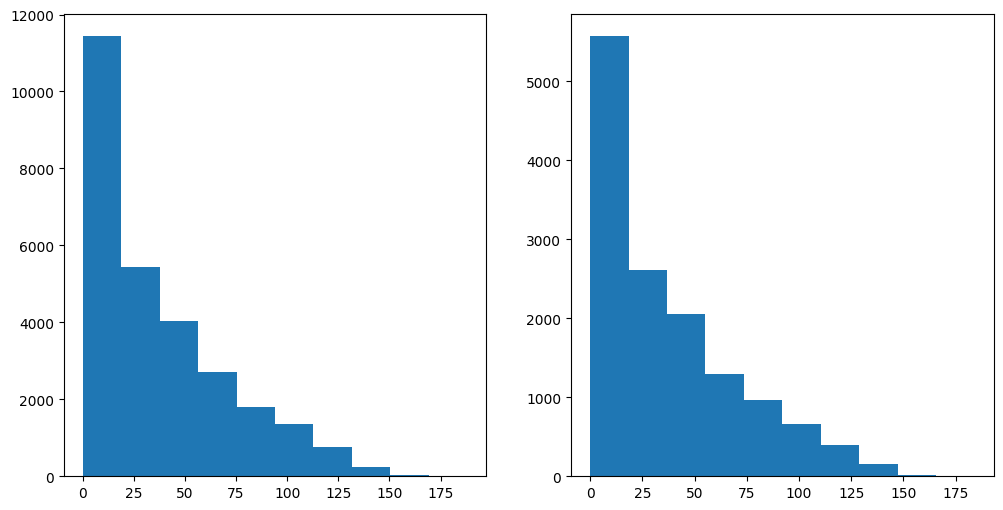

In [23]:
train_lens = [len(s) for s in x_train]
test_lens = [len(s) for s in x_test]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [24]:
max_len = 100
x_train = pad_sequences(x_train, maxlen=max_len, padding="post")
x_test = pad_sequences(x_test, maxlen=max_len, padding="post")
x_train.shape, x_test.shape

((27855, 100), (13721, 100))

# Model Training

In [38]:
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, max_len, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=6, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.7))
    model.add(Flatten())
    model.add(Dense(7, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
    model.summary()

    return model


In [44]:
filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= "val_accuracy" , verbose=1, save_best_only=True,
    mode= "max" )
callbacks_list = [checkpoint]

In [45]:
model = define_model(vocab_size=vocab_size, max_length=max_len)
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    verbose=0,
                    callbacks=callbacks_list
                    )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          3579900   
                                                                 
 conv1d_5 (Conv1D)           (None, 95, 32)            19232     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 47, 32)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 47, 32)            0         
                                                                 
 flatten_5 (Flatten)         (None, 1504)              0         
                                                                 
 dense_5 (Dense)             (None, 7)                 10535     
                                                      

In [47]:
model.load_weights("weights_best.hdf5")
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [48]:
_, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluate model on test dataset
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 86.401004
Test Accuracy: 76.845711


In [49]:
history_df = pd.DataFrame()
for key in history.history.keys():
    history_df[key] = history.history[key]
history_df


loss  accuracy  val_loss  val_accuracy
0  0.910261  0.635110  0.705672      0.724510
1  0.609673  0.762664  0.607924      0.768457
2  0.463885  0.822043  0.601175      0.766562
3  0.362523  0.864369  0.637866      0.763064
4  0.283881  0.894777  0.675180      0.764522
5  0.232622  0.913732  0.726740      0.762481
6  0.192459  0.927877  0.798050      0.759055
7  0.168793  0.937605  0.863547      0.751549
8  0.143873  0.946473  0.921264      0.753371
9  0.125292  0.955412  1.005964      0.755557

In [82]:
fig = px.line(history_df, x=history_df.index, y=['loss', 'val_loss'], title='Model Loss')
fig.update_xaxes(title_text = 'Epocs')
fig.update_yaxes(title_text = 'Loss')
fig.show()

In [83]:
fig = px.line(history_df, x=history_df.index, y=['accuracy', 'val_accuracy'], title='Model Accuracy')
fig.update_xaxes(title_text = 'Epocs')
fig.update_yaxes(title_text = 'Accuracy')
fig.show()

In [51]:
pred = np.argmax(model.predict(x_test), axis=1)
pred = Lb.inverse_transform(pred)
pred

429/429 [==============================] - 1s 2ms/step


array(['Normal', 'Suicidal', 'Depression', ..., 'Normal', 'Depression',
       'Anxiety'], dtype=object)

In [52]:
expected = np.argmax(y_test, axis=1)
expected = Lb.inverse_transform(expected)
expected

array(['Normal', 'Depression', 'Depression', ..., 'Normal', 'Suicidal',
       'Depression'], dtype=object)

In [142]:
conf_matrix = confusion_matrix(expected, pred)
fig = ff.create_annotated_heatmap(
    z = conf_matrix,
    x = list(set(pred)),
    y = list(set(expected))
)
fig.show()

In [132]:
test_df['clean_statement'] = test_df['statement'].apply(prepare_it)
test_df.head()

In [138]:
test_x = test_df['clean_statement']
test_y = test_df['status'].values

In [139]:
test_x = tk.texts_to_sequences(test_x)
test_x = pad_sequences(test_x, maxlen=max_len, padding='post')
test_x.shape

(11105, 100)

In [140]:
pred_x = np.argmax(model.predict(test_x), axis=1)
pred_x = Lb.inverse_transform(pred_x)
pred_x

348/348 [==============================] - 1s 2ms/step


array(['Normal', 'Normal', 'Anxiety', ..., 'Normal', 'Depression',
       'Normal'], dtype=object)

In [141]:
conf_matrix = confusion_matrix(test_y, pred_x)
fig = ff.create_annotated_heatmap(
    z = conf_matrix,
    x = list(set(pred_x)),
    y = list(set(test_y))
)
fig.show()